## XARRAY TUTORIAl:

https://tutorial.xarray.dev/intro.html

In [35]:
import xarray as xr
import numpy as np
import pandas as pd

In [36]:
# Time coordinate (using pandas)
time = pd.date_range("2021-01-01", periods=3, freq="D")  # 3 days

# Latitude and longitude (using numpy arrays)
lat = np.array([10.0, 10.5, 11.0])
lon = np.array([20.0, 20.5, 21.0, 21.5])


Time-independent data creation: "elevation"

In [74]:
# Let's create an elevation array of shape (lat, lon)
# We'll just use random values or you can define your own
np.random.seed(42)  # For reproducibility
elevation_data = 1000 + 500 * np.random.rand(len(lat), len(lon))


print(elevation_data)
elevation_data[1:,2:] = np.nan
elevation_data

[[1187.27005942 1475.3571532  1365.99697091 1299.3292421 ]
 [1078.00932022 1077.99726017 1029.04180608 1433.08807289]
 [1300.55750587 1354.0362889  1010.29224715 1484.95492608]]


array([[1187.27005942, 1475.3571532 , 1365.99697091, 1299.3292421 ],
       [1078.00932022, 1077.99726017,           nan,           nan],
       [1300.55750587, 1354.0362889 ,           nan,           nan]])

Time-dependent data creation (average temperature)

In [75]:
# Create a temperature array of shape (time, lat, lon)
temperature_data = 15 + 8 * np.random.rand(len(time), len(lat), len(lon))

### Combine the data

In [76]:
ds = xr.Dataset(
    {
        # "elevation" -> 2D data, coords are (lat, lon)
        "elevation": (["lat", "lon"], elevation_data),
        
        # "temperature" -> 3D data, coords are (time, lat, lon)
        "temperature": (["time", "lat", "lon"], temperature_data),
    },
    coords={
        "time": time,
        "lat": lat,
        "lon": lon
    },
    attrs={
        "description": "A toy data cube with elevation and temperature."
    }
)

ds

<xarray.Dataset> Size: 464B
Dimensions:      (lat: 3, lon: 4, time: 3)
Coordinates:
  * time         (time) datetime64[ns] 24B 2021-01-01 2021-01-02 2021-01-03
  * lat          (lat) float64 24B 10.0 10.5 11.0
  * lon          (lon) float64 32B 20.0 20.5 21.0 21.5
Data variables:
    elevation    (lat, lon) float64 96B 1.187e+03 1.475e+03 ... nan nan
    temperature  (time, lat, lon) float64 288B 21.66 16.7 16.45 ... 17.49 19.16
Attributes:
    description:  A toy data cube with elevation and temperature.

In [77]:
# Access as dataset attributes
print(ds.elevation)
print()
print(ds.temperature)
print()
# Or using dictionary-style access
print(ds["elevation"])
print()
print(ds["temperature"])


<xarray.DataArray 'elevation' (lat: 3, lon: 4)> Size: 96B
array([[1187.27005942, 1475.3571532 , 1365.99697091, 1299.3292421 ],
       [1078.00932022, 1077.99726017,           nan,           nan],
       [1300.55750587, 1354.0362889 ,           nan,           nan]])
Coordinates:
  * lat      (lat) float64 24B 10.0 10.5 11.0
  * lon      (lon) float64 32B 20.0 20.5 21.0 21.5

<xarray.DataArray 'temperature' (time: 3, lat: 3, lon: 4)> Size: 288B
array([[[21.65954113, 16.69871289, 16.45459974, 16.46723608],
        [17.43393794, 19.19805145, 18.45556015, 17.32983312],
        [19.89482316, 16.11595089, 17.33715719, 17.93089475]],

       [[18.64855987, 21.28140769, 16.59739026, 19.11387551],
        [19.73931655, 15.3716033 , 19.86035882, 16.36419299],
        [15.52041274, 22.5910843 , 22.72505626, 21.46717878]],

       [[17.43691015, 15.78137691, 20.47386421, 18.52121995],
        [15.97630588, 18.96141528, 15.27510817, 22.27456322],
        [17.07023985, 20.30017827, 17.49368861, 19.16

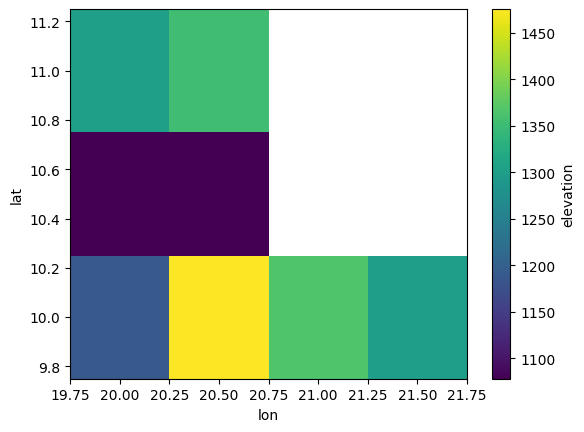

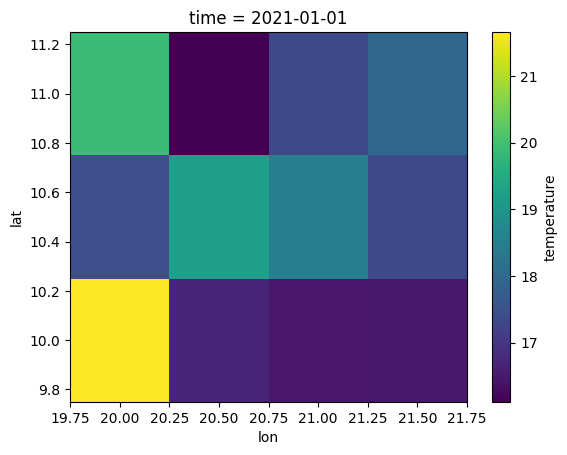

In [78]:
import matplotlib.pyplot as plt

# Plot the elevation for a single lat-lon grid
ds.elevation.plot()
plt.show()

# Plot the temperature of the first time slice
ds.temperature.isel(time=0).plot()
plt.show()


In [49]:
ds["temperature"].mean(dim="time")

<xarray.DataArray 'temperature' (lat: 3, lon: 4)> Size: 96B
array([[19.24833705, 17.92049916, 17.8419514 , 18.03411051],
       [17.71652012, 17.84369001, 17.86367571, 18.65619644],
       [17.49515858, 19.66907115, 19.18530069, 19.51953923]])
Coordinates:
  * lat      (lat) float64 24B 10.0 10.5 11.0
  * lon      (lon) float64 32B 20.0 20.5 21.0 21.5

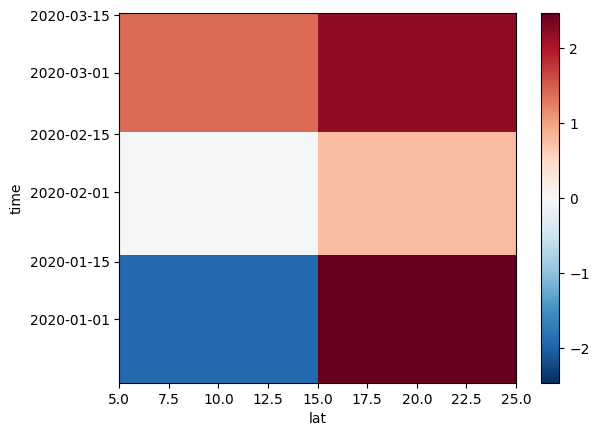

In [54]:
"""
To try Xarray in the browser,
use the console located 👉 or 👇:
1. Type code in the input cell and press
   Shift + Enter to execute
2. Or copy paste the code, and click on
   the "Run" ▶ button in the toolbar
"""
import xarray as xr
import pandas as pd
import numpy as np

data = xr.DataArray(
    np.random.randn(3, 2, 3),
    dims=("time", "lat", "lon"),
    coords={
        "lat": [10, 20],
        "time": pd.date_range(
            "2020-01", periods=3, freq="MS"
        ),
    },
)

# positional and by integer label, like numpy
data[0, :]

# loc or "location": positional and
# coordinate label, like pandas
data.loc[:, 10]

# isel or "integer select": by dimension name
# and integer label
data.isel(lat=0)

# sel or "select": by dimension name and
# coordinate label
data.sel(time="2020-01")

# Data aggregations uses dimension names
# instead of axis numbers
data.mean(dim=["time", "lat"])

# quick and convenient visualizations
data.isel(lon=0).plot();

# Pretty neat, eh? :)
# For more, head over to the documentation page